In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
import scipy.stats

/home/marcusklaas/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
def plot_series(s):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(s.index.tolist(), s.tolist())
    
    # plot curve
    plt.figure(figsize=(20,10))
    plt.plot( s, marker='', color='olive', linewidth=2)
    plt.xlabel('Input size')
    plt.ylabel('Time')
    plt.ylim(bottom=0)
    plt.xlim(left=0)
    plt.title('Scaling')
    
    # plot linear fit
    max_index = max(s.index)
    plt.plot(pd.Series([intercept, max_index * slope + intercept], index=[0, max_index]))
    

In [4]:
def sample_fn(n, growth_fn, sigma_squared):
    indices = []
    values = []
    for i in range(1, n + 1):
        indices.append(i)
        value = growth_fn(i) + sum(np.random.normal(0, sigma_squared, i))
        values.append(value)
    return pd.Series(values, index=indices)

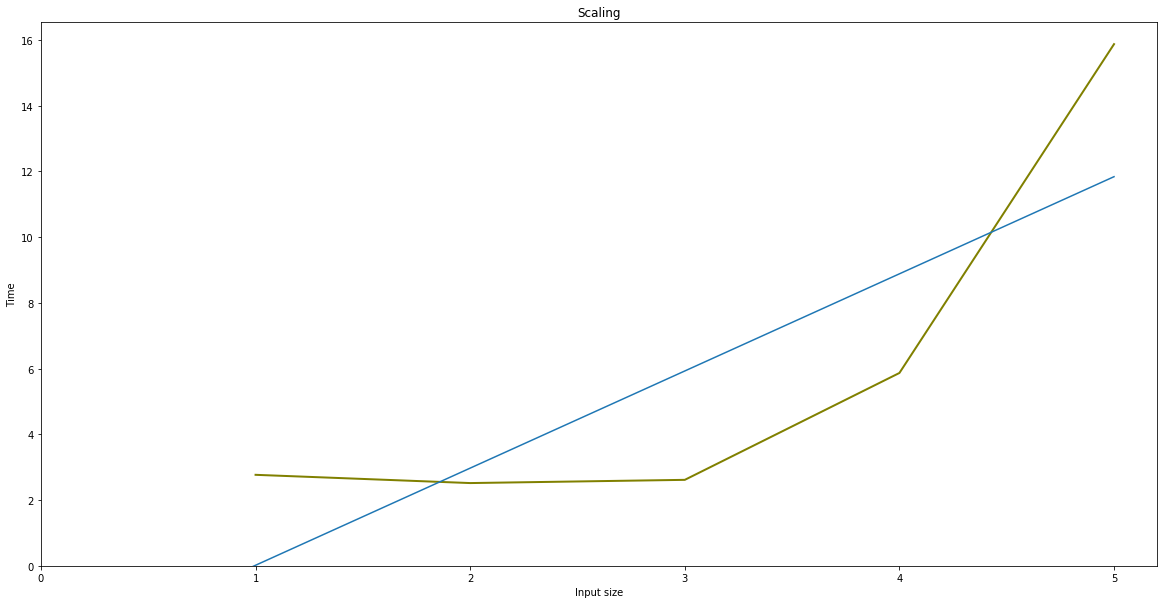

In [5]:
s = sample_fn(5, lambda x: x * (1 + math.log(x)), 1)
plot_series(s)

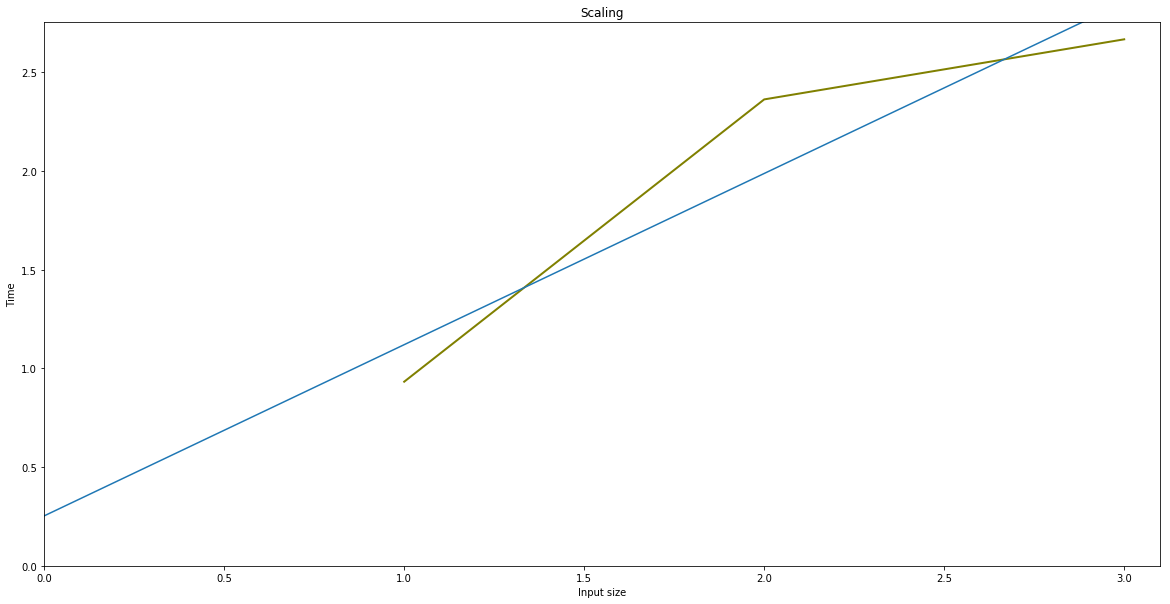

In [6]:
s = sample_fn(3, lambda x: 0.01 + x, 0.2)
plot_series(s)

In [7]:
s = sample_fn(5, lambda x: x * (1 + math.log(x)), 1)
s

1    -0.221012
2     5.232124
3     4.881254
4     9.879373
5    11.230776
dtype: float64

In [22]:
import statsmodels.api as sm
X = sm.add_constant(s.index.tolist())
y = s.tolist()
print(X)
model = sm.OLS(y, X).fit()

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


In [23]:
model.bse

array([1.58447289, 0.47773655])

In [24]:
model.pvalues

array([0.28353323, 0.01036362])

In [25]:
model.summary()

/home/marcusklaas/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     33.26
Date:                Sat, 01 Jun 2019   Prob (F-statistic):             0.0104
Time:                        14:12:56   Log-Likelihood:                -7.8806
No. Observations:                   5   AIC:                             19.76
Df Residuals:                       3   BIC:                             18.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0647      1.584     -1.303      0.284      -7.107       2.978
x1             2.7551      0.478      5.767      0.010       1.235       4.275
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.495
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.572
Skew:                           0.415   Prob(JB):                        0.751
Kurtosis:                       1.567   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
-2.0647 / 1.584

-1.3034722222222224

In [28]:
(-7.107 - (-2.0647)) / -1.3034722222222224

3.868360149174214

In [29]:
(2.978 - (-2.0647)) / -1.3034722222222224

-3.8686670218433665

In [30]:
from scipy.stats import norm

In [32]:
2 * norm.ppf(0.975)

3.919927969080108

In [42]:
norm.cdf(-1.31)

0.09509791779523902

In [43]:
from scipy import stats
#Studnt, n=999, p<0.05, 2-tail

In [62]:
#Studnt, n=999, p<0.05%, Single tail
#equivalent to Excel TINV(2*0.05,999)
stats.t.ppf(1E-6, 5)

-24.771029720535676

In [63]:
-2.0647 / 1.584

-1.3034722222222224